In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('iris-data.csv', index_col = 0)

In [5]:
df.columns

Index(['lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo', 'tipo_flor'], dtype='object')

In [6]:
df.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

In [8]:
y = df['lar.petalo']

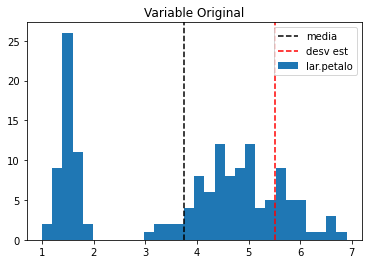

In [16]:
fig, ax = plt.subplots()
ax.set_title('Variable Original')
ax.hist(y, bins = 30, label='lar.petalo')
ax.axvline(x = np.mean(y), c = 'k', label = 'media', linestyle = '--')
ax.axvline(x = np.mean(y) + np.std(y), c = 'red', label = 'desv est', linestyle = '--')
ax.legend()

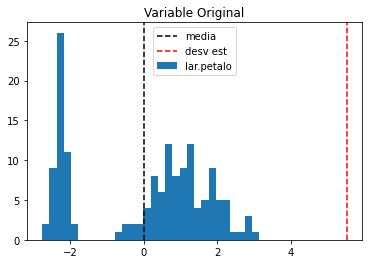

In [18]:
fig, ax = plt.subplots()
ax.set_title('Variable Original')
ax.hist(y - np.mean(y), bins = 30, label='lar.petalo')
ax.axvline(x = np.mean(y - np.mean(y)), c = 'k', label = 'media', linestyle = '--')
ax.axvline(x = np.mean(y) + np.std(y), c = 'red', label = 'desv est', linestyle = '--')
ax.legend()

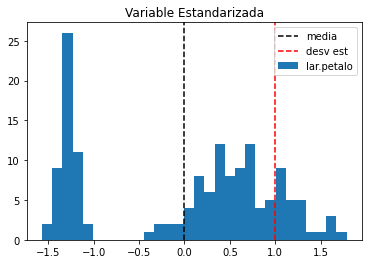

In [26]:
fig, ax = plt.subplots()
ax.set_title('Variable Estandarizada')
ax.hist((y - np.mean(y))/np.std(y), bins = 30, label='lar.petalo')
ax.axvline(x = np.mean((np.mean(y - np.mean(y))/np.std(y))), c = 'k', label = 'media', linestyle = '--')
ax.axvline(x = np.mean((np.mean(y - np.mean(y))/np.std(y))) + np.std((y - np.mean(y))/np.std(y)), c = 'red', label = 'desv est', linestyle = '--')
ax.legend()

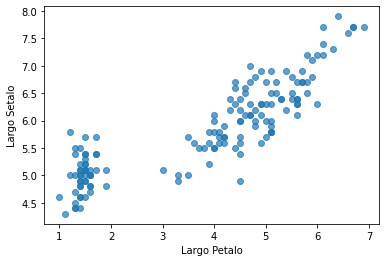

In [30]:
df['lar.petalo'], df['lar.sepalo']
fig, ax = plt.subplots()
ax.scatter(df['lar.petalo'], df['lar.sepalo'], alpha = 0.7)
ax.set_xlabel('Largo Petalo')
ax.set_ylabel('Largo Setalo')
ax.autoscale()

In [31]:
np.cov(df['lar.petalo'], df['lar.sepalo'])

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

In [35]:
corrSpearman = df.corr(method = 'spearman')
corrSpearman

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.166778,0.881898,0.834289,0.798078
anc.sepalo,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
lar.petalo,0.881898,-0.309635,1.000000,0.937667,0.935431
anc.petalo,0.834289,-0.289032,0.937667,1.000000,0.938179
tipo_flor,0.798078,-0.440290,0.935431,0.938179,1.000000


In [40]:
corrKendall = df.corr(method = 'kendall')
corrKendall

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.076997,0.718516,0.655309,0.670444
anc.sepalo,-0.076997,1.000000,-0.185994,-0.157126,-0.337614
lar.petalo,0.718516,-0.185994,1.000000,0.806891,0.822911
anc.petalo,0.655309,-0.157126,0.806891,1.000000,0.839687
tipo_flor,0.670444,-0.337614,0.822911,0.839687,1.000000


<AxesSubplot:>

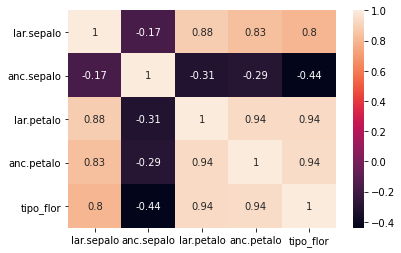

In [50]:
sns.heatmap(corrSpearman, xticklabels = corrSpearman.columns, yticklabels = corrSpearman.columns, annot = True)

<AxesSubplot:>

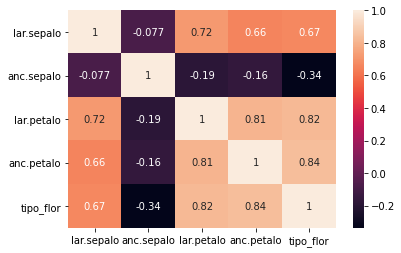

In [51]:
sns.heatmap(corrKendall, xticklabels = corrKendall.columns, yticklabels = corrKendall.columns, annot=True)

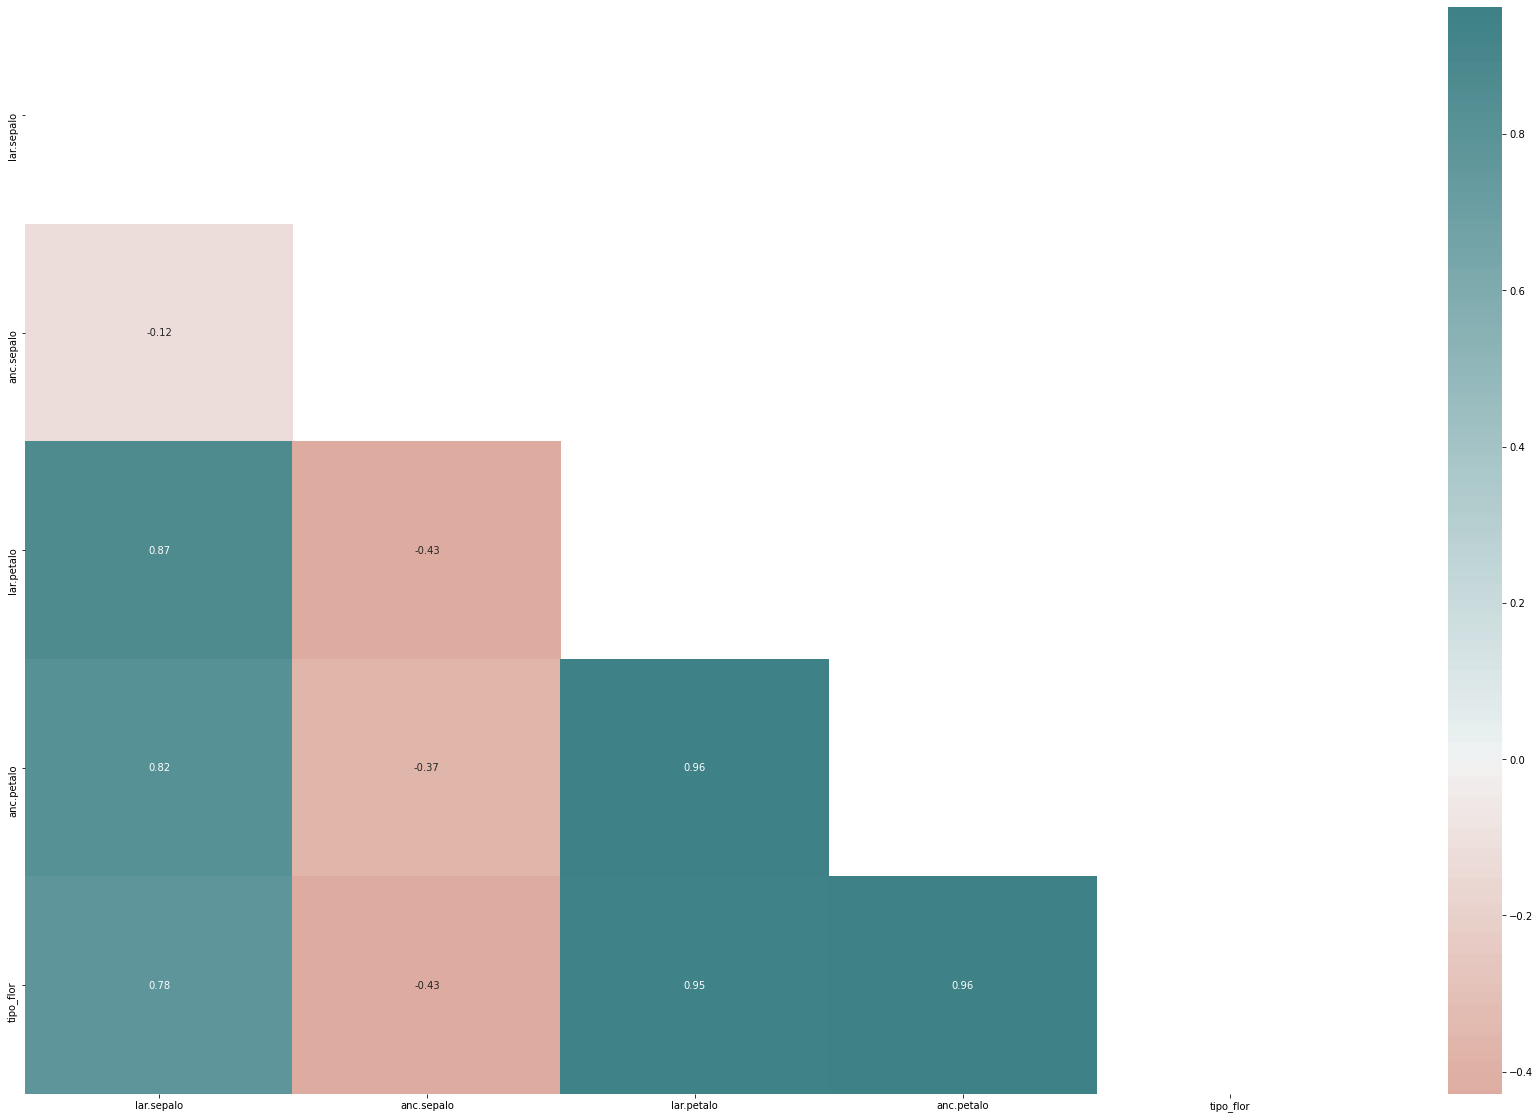

In [42]:
plt.subplots(figsize = (30,20))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), cmap = sns.diverging_palette(20, 200, n = 200), mask = mask, annot = True, center = 0);

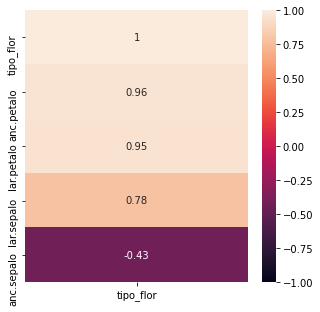

In [44]:
plt.figure(figsize = (5, 5))
sns.heatmap(df.corr()[['tipo_flor']].sort_values(by=['tipo_flor'], ascending=False).head(50), vmin=-1, annot=True);

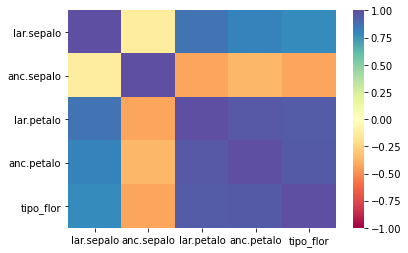

In [48]:
pearson_cor = df.corr()
sns.heatmap(pearson_cor, xticklabels=pearson_cor.columns, yticklabels=pearson_cor.columns, vmin=-1, vmax=1, cmap='Spectral')
plt.show()

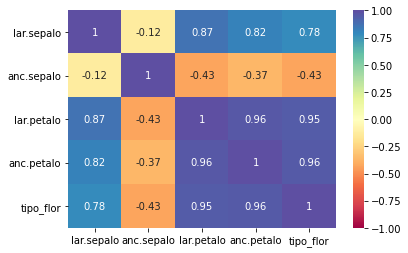

In [49]:
pearson_cor = df.corr()
sns.heatmap(pearson_cor, xticklabels=pearson_cor.columns, yticklabels=pearson_cor.columns, vmin=-1, vmax=1, cmap='Spectral', annot=True)
plt.show()